
# Overlay Toggle Viewer with Scalebar (Notebook Version)

This notebook reproduces your script as a Jupyter workflow. It avoids the `TkAgg` backend, uses PIL for all image I/O (so no `imageio` dependency), and adds simple sanity checks for file paths.

**How to use**
1. Edit the **Configuration** cell to point to your image files.
2. Run the **Setup** cell.
3. Run the **Load images** and **Viewer** cells to display the interactive figure.


In [1]:

%matplotlib widget

import os
import warnings
from PIL import Image, ImageFile
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import CheckButtons
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

# Suppress PIL warnings for large images
warnings.simplefilter('ignore', Image.DecompressionBombWarning)
Image.MAX_IMAGE_PIXELS = None
ImageFile.LOAD_TRUNCATED_IMAGES = True


In [2]:

# ────────────────────────────────────────────────────────────────────────
# CONFIGURATION — edit these to match your files
# ────────────────────────────────────────────────────────────────────────
BASE_DIR         = r'D:\Results\Interactive_figures\Stitched_sixteenth'
BASE_NAME        = 'Run25BR_top_right.png'
OVERLAY_NAME     = 'Run25BR_top_right_overlayed.png'

# Scale in pixels per micrometer
PX_PER_UM        = 8.0453
# Scalebar length in micrometers
SCALER_LENGTH_UM = 10
# ────────────────────────────────────────────────────────────────────────

BASE_PATH    = os.path.join(BASE_DIR, BASE_NAME)
OVERLAY_PATH = os.path.join(BASE_DIR, OVERLAY_NAME)

# Quick sanity check
print("Base path exists:", os.path.exists(BASE_PATH), "->", BASE_PATH)
print("Overlay path exists:", os.path.exists(OVERLAY_PATH), "->", OVERLAY_PATH)


Base path exists: True -> D:\Results\Interactive_figures\Stitched_sixteenth\Run25BR_top_right.png
Overlay path exists: True -> D:\Results\Interactive_figures\Stitched_sixteenth\Run25BR_top_right_overlayed.png


In [3]:

def load_images(base_path, overlay_path):
    """
    Load base as grayscale (single channel) and overlay as RGBA using PIL only.
    Returns: base_img (H,W), overlay_img (H,W,4)
    """
    if not os.path.exists(base_path):
        raise FileNotFoundError(f"Base image not found: {base_path}")
    if not os.path.exists(overlay_path):
        raise FileNotFoundError(f"Overlay image not found: {overlay_path}")

    # Load base as single-channel grayscale
    base_pil = Image.open(base_path).convert('L')
    base_img = np.array(base_pil)

    # Load overlay as RGBA (PIL handles .png alpha fine)
    overlay_pil = Image.open(overlay_path).convert('RGBA')
    overlay_img = np.array(overlay_pil)

    # Optional: check and resize overlay to match base if dimensions differ
    if base_img.shape[:2] != overlay_img.shape[:2]:
        # Resize overlay to base size with nearest neighbor to keep hard edges
        overlay_pil = overlay_pil.resize(base_img.shape[::-1], resample=Image.NEAREST)
        overlay_img = np.array(overlay_pil)

    return base_img, overlay_img

# Try loading (won't display yet)
try:
    _base_img, _overlay_img = load_images(BASE_PATH, OVERLAY_PATH)
    print("Loaded base:", _base_img.shape, "overlay:", _overlay_img.shape)
except Exception as e:
    print("ERROR:", e)


Loaded base: (12211, 12140) overlay: (12211, 12140, 4)


0

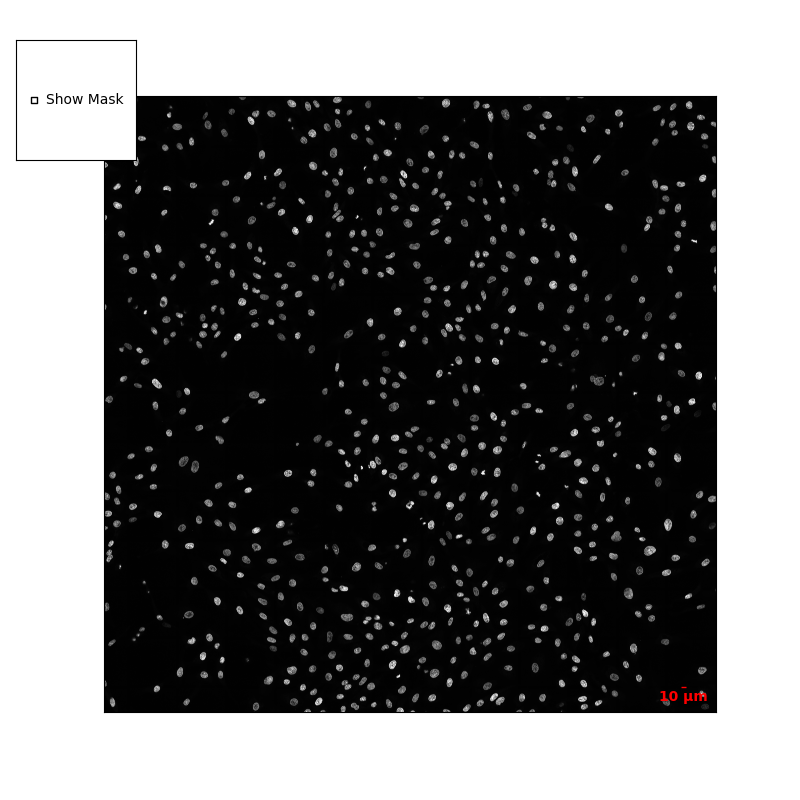

In [4]:

# Create the interactive viewer
base_img, overlay = load_images(BASE_PATH, OVERLAY_PATH)

fig, ax = plt.subplots(figsize=(8, 8))

# Show base grayscale
im_base    = ax.imshow(base_img, cmap='gray')
# Show overlay, initially hidden
im_overlay = ax.imshow(overlay, visible=False)

ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')

# Add scalebar
bar_px = SCALER_LENGTH_UM * PX_PER_UM
fontprops = fm.FontProperties(size=10, weight='bold')
scalebar = AnchoredSizeBar(ax.transData,
                           bar_px,
                           f"{SCALER_LENGTH_UM} μm",
                           loc='lower right',
                           pad=0.5,
                           color='red',
                           frameon=False,
                           size_vertical=2,
                           fontproperties=fontprops)
ax.add_artist(scalebar)

# Add checkbox to toggle overlay
check_ax = fig.add_axes([0.02, 0.8, 0.15, 0.15])
check = CheckButtons(check_ax, ['Show Mask'], [False])

def on_toggle(label):
    im_overlay.set_visible(not im_overlay.get_visible())
    fig.canvas.draw_idle()

check.on_clicked(on_toggle)



### Notes & Troubleshooting
- If the checkbox isn't interactive in JupyterLab, ensure `ipympl` is installed and enabled, then restart the kernel.
- If your overlay size doesn't match your base image, the load function automatically resizes the overlay to match.
- Paths wrong? Edit the **Configuration** cell and rerun.


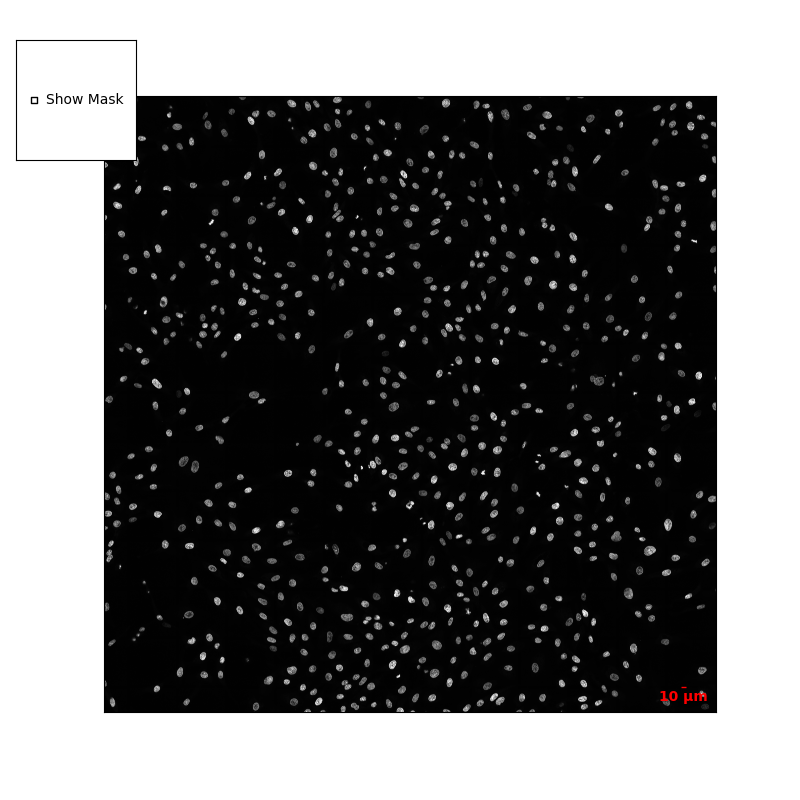

In [5]:
#| label: fig:stitched-image
#| caption: "_."

plt.show()